<a href="https://colab.research.google.com/github/TheBangis/ArewaDS-Deep-Learning/blob/main/Part_1_Deep_Learning_with_Pytorch/week2/week_2_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/arewadataScience/ArewaDS-Deep-Learning/blob/main/Part_1_Deep_Learning_with_Pytorch/week2/week_2_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Arewa DataScience Academy
### Deep Learning Cohort 1.0
#### Name : Babangida Sani
#### Email : bsani480@gmail.com
### WEEK 2 Exercises

### Exercises:
Please, see week 2 exercises from [**Learn PyTorch for Deep Learning**: 01. Pytorch Workflows](https://www.learnpytorch.io/01_pytorch_workflow/#exercises)

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

print(torch.__version__)

2.1.0+cu121


#### 1. Create a straight line dataset using the linear regression formula (weight * X + bias).
##### . Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
##### . Split the data into 80% training, 20% testing.
##### . Plot the training and testing data so it becomes visual.

In [23]:
# set weight and bias

weight = 0.3
bias = 0.9

# create data

start = 0
step = 0.02
end = 2

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.9000],
         [0.9060],
         [0.9120],
         [0.9180],
         [0.9240],
         [0.9300],
         [0.9360],
         [0.9420],
         [0.9480],
         [0.9540]]))

In [24]:
# Create train and test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [25]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

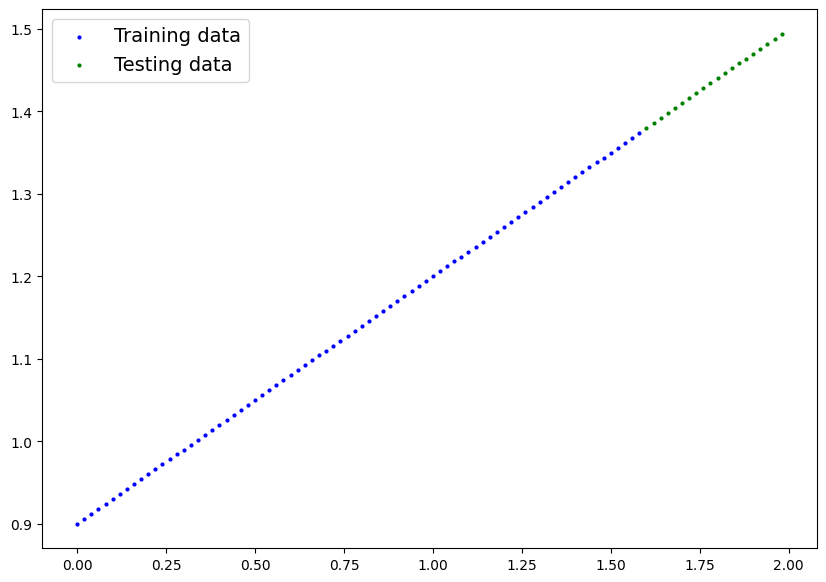

In [27]:
plot_predictions()

#### 2. Build a PyTorch model by subclassing nn.Module.
##### . Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
##### . Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
##### . Once you've constructed the model, make an instance of it and check its state_dict().
##### . Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.

In [29]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                dtype=torch.float),
                                   requires_grad=True)

        self.bias = nn.Parameter(torch.randn(1,
                                            dtype=torch.float),
                                requires_grad=True)

# Forward computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [30]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [31]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [33]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

In [34]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 20
Number of predictions made: 20
Predicted values:
tensor([[0.6675],
        [0.6742],
        [0.6810],
        [0.6877],
        [0.6944],
        [0.7012],
        [0.7079],
        [0.7147],
        [0.7214],
        [0.7281],
        [0.7349],
        [0.7416],
        [0.7483],
        [0.7551],
        [0.7618],
        [0.7685],
        [0.7753],
        [0.7820],
        [0.7887],
        [0.7955]])


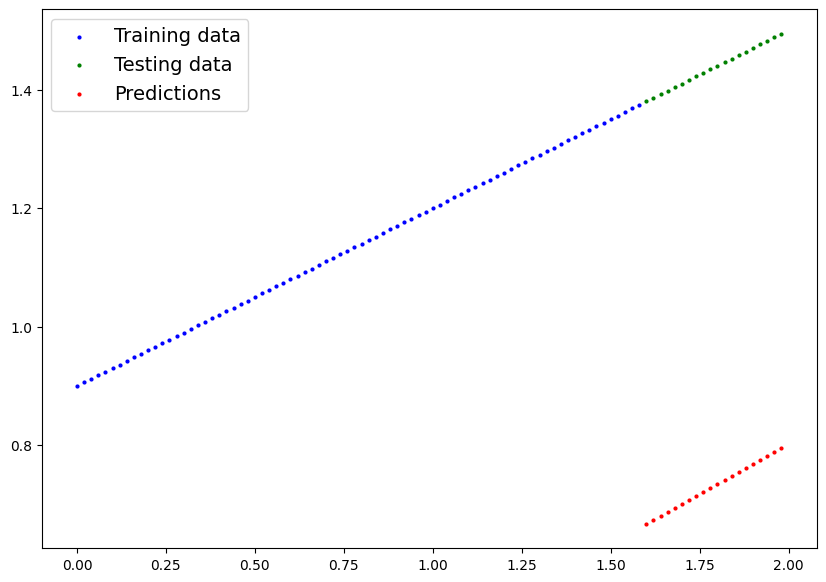

In [35]:
plot_predictions(predictions=y_preds)

In [36]:
y_test - y_preds

tensor([[0.7125],
        [0.7118],
        [0.7110],
        [0.7103],
        [0.7096],
        [0.7088],
        [0.7081],
        [0.7073],
        [0.7066],
        [0.7059],
        [0.7051],
        [0.7044],
        [0.7037],
        [0.7029],
        [0.7022],
        [0.7015],
        [0.7007],
        [0.7000],
        [0.6993],
        [0.6985]])

#### 3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
##### Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2. Write a training loop to perform the appropriate training steps for 300 epochs. The training loop should test the model on the test dataset every 20 epochs.

In [38]:
# Create the loss function
loss_fn = nn.L1Loss()

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # using model_1
                            lr=0.01) #

In [41]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 300

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 20 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.010932961478829384 | MAE Test Loss: 0.006088173482567072 
Epoch: 20 | MAE Train Loss: 0.010932961478829384 | MAE Test Loss: 0.006088173482567072 
Epoch: 40 | MAE Train Loss: 0.010932961478829384 | MAE Test Loss: 0.006088173482567072 
Epoch: 60 | MAE Train Loss: 0.010932961478829384 | MAE Test Loss: 0.006088173482567072 
Epoch: 80 | MAE Train Loss: 0.010932961478829384 | MAE Test Loss: 0.006088173482567072 
Epoch: 100 | MAE Train Loss: 0.010932961478829384 | MAE Test Loss: 0.006088173482567072 
Epoch: 120 | MAE Train Loss: 0.010932961478829384 | MAE Test Loss: 0.006088173482567072 
Epoch: 140 | MAE Train Loss: 0.010932961478829384 | MAE Test Loss: 0.006088173482567072 
Epoch: 160 | MAE Train Loss: 0.010932961478829384 | MAE Test Loss: 0.006088173482567072 
Epoch: 180 | MAE Train Loss: 0.010932961478829384 | MAE Test Loss: 0.006088173482567072 
Epoch: 200 | MAE Train Loss: 0.010932961478829384 | MAE Test Loss: 0.006088173482567072 
Epoch: 220 | MAE Train Loss

#### 4. Make predictions with the trained model on the test data.
#### . Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [45]:
# 1. Set the model in evaluation mode
model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[1.3967],
        [1.4028],
        [1.4090],
        [1.4151],
        [1.4213],
        [1.4274],
        [1.4336],
        [1.4397],
        [1.4458],
        [1.4520],
        [1.4581],
        [1.4643],
        [1.4704],
        [1.4766],
        [1.4827],
        [1.4888],
        [1.4950],
        [1.5011],
        [1.5073],
        [1.5134]])

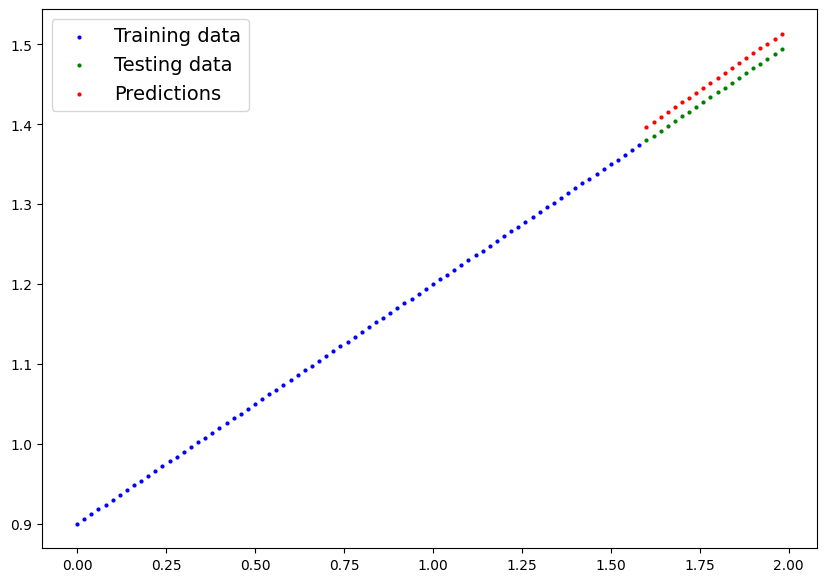

In [47]:
plot_predictions(predictions=y_preds)

#### 5. Save your trained model's state_dict() to file.
##### . Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
##### . Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [49]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow


In [50]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [52]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

In [53]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### Additional Exercise
[Click to view PDF 📄](ArewaDS_Deep_Learning_Advanced_Assignment_Week2.pdf)

SUBMIT ASSIGNMENT HERE: [CLICK ME ▶️](https://forms.gle/876vi4aNoFf4A2mU7)